In [28]:
import rsatoolbox as rsa
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import pandas as pd
import surfAnalysisPy as surf
import SUITPy as suit
import nibabel as nb
import nitools
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# SET PATHS:
baseDir = '/Volumes/Diedrichsen_data$/data/Chord_exp/EFC_patternfMRI'
bidsDir = 'BIDS'
anatomicalDir = 'anatomicals'
freesurferDir = 'surfaceFreesurfer'
surfacewbDir = 'surfaceWB' 
behavDir = 'behavioural'
regDir = 'ROI'
atlasDir = '/Volumes/diedrichsen_data$/data/Atlas_templates/fs_LR_32'


## Projection of BETA maps

/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_52896/1756986750.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


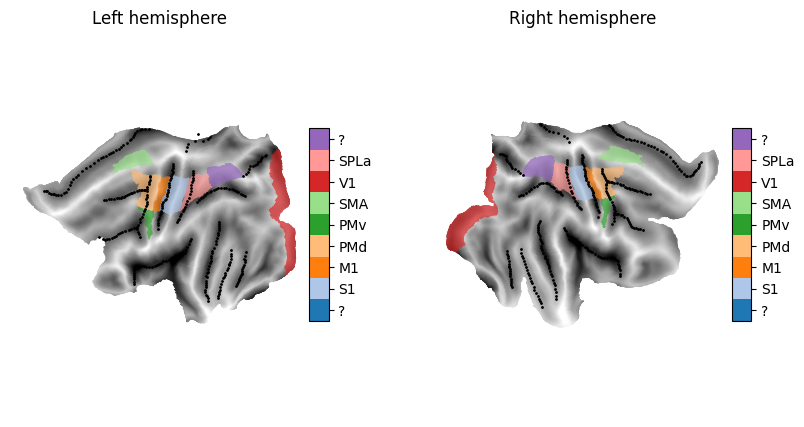

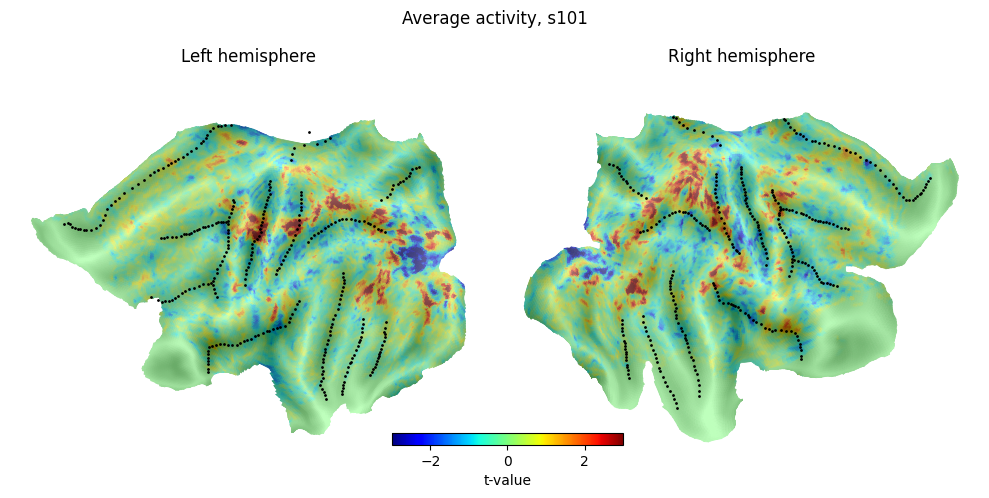

In [27]:
sn = 101
glm = 3
ses = 1
Hem = ['L', 'R']

borders = {'L': './surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border',
           'R': './surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.border'}

# =============== ROI LABEL IMAGE ===============:
atlas = 'ROI'
region_names = ['?', 'S1', 'M1', 'PMd', 'PMv', 'SMA', 'V1', 'SPLa', '?']
Hem = ['L', 'R']
borders = {'L': './surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border',
           'R': './surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.border'}

cmap = plt.colormaps.get_cmap('tab20')  # Get the tab20 colormap

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for ax, H in zip(axs, Hem):
    D = nb.load(os.path.join(atlasDir, f'{atlas}.32k.{H}.label.gii'))
    darray = nitools.get_gifti_data_matrix(D)

    # Get unique region numbers
    unique_regions = np.unique(darray)

    plt.sca(ax)
    surf.plot.plotmap(darray, f'fs32k_{H}',
                      underlay=None,
                      borders=borders[H],
                      overlay_type='label',
                      label_names=region_names,
                      cmap='tab20',
                      underscale=[-1.5, 1],
                      alpha=.7,
                      new_figure=False,
                      colorbar=True,
                      backgroundcolor = 'w'
                      )
    
axs[0].set_title('Left hemisphere')
axs[1].set_title('Right hemisphere')


# =============== FUNCTIONAL DATA PROJECTION ===============:
vmin, vmax = -3, 3

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for ax, H in zip(axs, Hem):
    D = nb.load(os.path.join(baseDir, surfacewbDir, f's{sn}', f'glm{glm}.ses-{ses:02d}.spmT.{H}.func.gii'))
    darray = nitools.get_gifti_data_matrix(D)
    
    plt.sca(ax)
    surf.plot.plotmap(darray.mean(axis=1), f'fs32k_{H}',
                      underlay=None,
                      borders=borders[H],
                      cscale=[vmin, vmax],
                      cmap='jet',
                      underscale=[-1.5, 1],
                      alpha=.5,
                      new_figure=False,
                      colorbar=False,
                      # frame=[xlim[0], xlim[1], ylim[0], ylim[1]]
                      )

# make colorbar
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(norm=norm, cmap='jet')
cbar = fig.colorbar(sm, ax=[axs[0], axs[1]], orientation='horizontal', fraction=0.03)
cbar.set_label('t-value')

axs[0].set_title('Left hemisphere')
axs[1].set_title('Right hemisphere')

fig.suptitle(f'Average activity, s{sn}')
fig.tight_layout()

/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_52896/1553813582.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis", 13)
/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_52896/1553813582.py:27: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  y_adj = np.nanmean(T_dict['y_adj'][((T_dict['name'] == roi[r]) & (T_dict['chordID'] == ch) & (T_dict['hem'] == Hem)).flatten()], axis=0)


TypeError: 'ListedColormap' object is not subscriptable

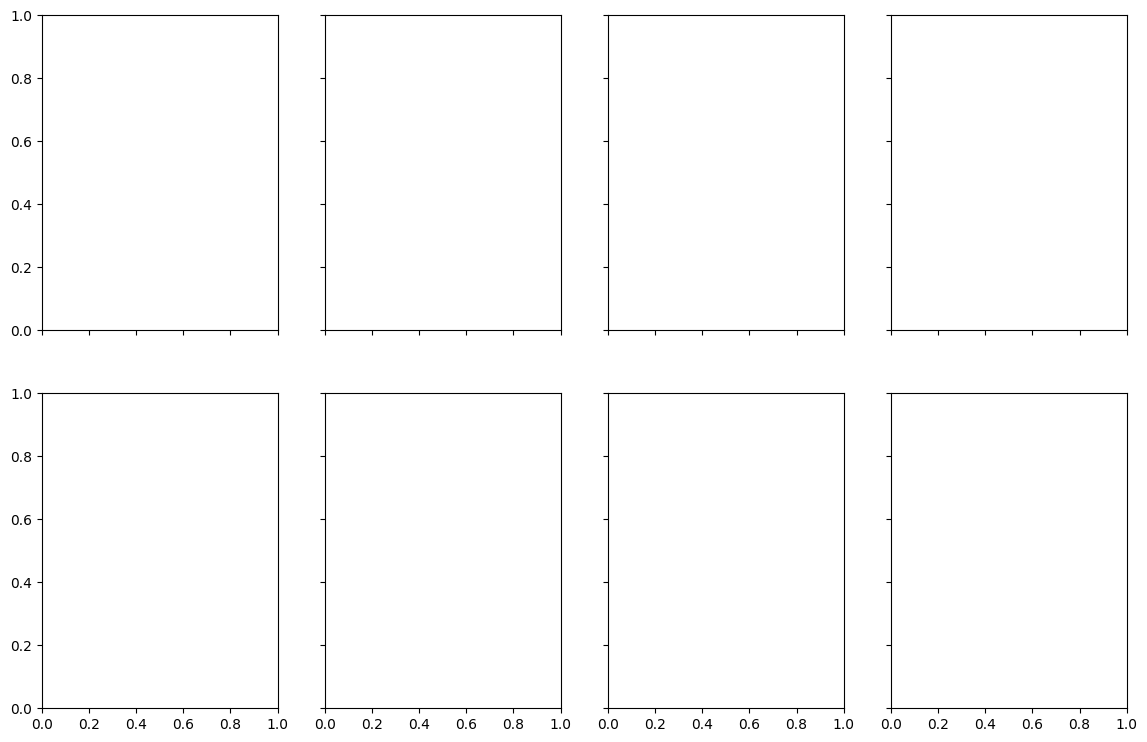

In [40]:
import scipy

Hem = 'L'
roi = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
r = 0
glm = 3
ses = 1
sn=101

d = pd.read_table(os.path.join(baseDir, behavDir, f's{sn}', f'ses-{ses:02d}', f'efc4_101.dat'))
chordID = np.unique(d['chordID'].values)
chordID = chordID[0:13]
cmap = cm.get_cmap("viridis", 13)
# chordID = chordID[13:26]
mat = scipy.io.loadmat(os.path.join(baseDir, regDir, f's{sn}', f'ses-{ses:02d}', f'hrf_glm{glm}.mat'))
T = mat['T'][0, 0]
T_fields = T.dtype.names
T_dict = {field: T[field] for field in T_fields}

tAx = np.linspace(-6, 12, 19)

fig, axs = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(14, 9))
for i in range(2):
    for j in range(4):
        
        for ch in chordID:
            y_adj = np.nanmean(T_dict['y_adj'][((T_dict['name'] == roi[r]) & (T_dict['chordID'] == ch) & (T_dict['hem'] == Hem)).flatten()], axis=0)
            # y_hat = np.nanmean(T_dict['y_hat'][((T_dict['name'] == roi[r]) & (T_dict['chordID'] == ch) &  (T_dict['hem'] == Hem)).flatten()], axis=0)

            axs[i, j].plot(tAx, y_adj, color=cmap[i], label=ch, ls='-')
            # axs[i, j].plot(tAx, y_hat, color=gl.colour_mapping[f'glm{glm}'][f'chordID:{ch}'], label='go hat', ls='--')

        axs[i, j].axvline(0, color='k', ls='-', lw=.8)
        axs[i, j].axvline(.5, color='k', ls='--', lw=.8)
        axs[i, j].axvline(3.5, color='k', ls='-.', lw=.8)
        axs[i, j].axvline(6, color='grey', ls='-', lw=.8)
        axs[i, j].axvline(6.5, color='grey', ls='--', lw=.8)
        axs[i, j].axvline(9.5, color='grey', ls='-.', lw=.8)
        axs[i, j].set_title(roi[r])
        axs[i, j].set_xlim([-6, 12])
        axs[i, j].set_xticks([ -6, 0, 6, 12])

        # Remove unnecessary spines
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)

        # Hide left and bottom spines based on row/column
        if i == 0:
            axs[i, j].spines['bottom'].set_visible(False)  # First row, hide bottom spine
        if j > 0:
            axs[i, j].spines['left'].set_visible(False)  # Hide left spines except first column

        # Hide ticks for non-left columns and first row
        if j > 0:
            axs[i, j].tick_params(axis='y', left=False)
        if i == 0:
            axs[i, j].tick_params(axis='x', bottom=False)

        r += 1

# Ensure left spines and ticks are visible for the first column
for i in range(2):
    axs[i, 0].spines['left'].set_visible(True)  # Show left spine for first column
    axs[i, 0].spines['left'].set_linewidth(2)  # Set left spine width for first column
    axs[i, 0].set_ylim([-2.6, 2.6])
    axs[i, 0].spines['left'].set_bounds([-2, 2])
    axs[i, 0].tick_params(axis='y', width=2)  # Show y-axis ticks for the first column

# Ensure bottom spines and ticks are visible for the second row
for j in range(4):
    axs[1, j].spines['bottom'].set_visible(True)  # Show bottom spine for second row
    axs[1, j].spines['bottom'].set_linewidth(2)  # Set bottom spine width for second row
    axs[1, j].spines['bottom'].set_bounds([-6, 12])
    axs[1, j].tick_params(axis='x', width=2)  # Show x-axis ticks for second row

# Legend and labels
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, .9), frameon=False)
fig.supylabel('activation (a.u.)')
fig.supxlabel('time relative to startTrialReal (s)')
fig.suptitle(f'Activation relative to trial onset (participant: sn{sn}, hemisphere:{Hem}, glm:{glm})')

fig.subplots_adjust(top=0.75)
